### Creating unknown person dataset

In [94]:
path="archive (10)\lfw-deepfunneled\lfw-deepfunneled"
import os 
import cv2
import matplotlib.pyplot as plt 


In [95]:
os.listdir()

cu=[]
#1
def detect_face(frame):
    detector=cv2.CascadeClassifier("haarcascade_frontalface_alt.xml")
    face=detector.detectMultiScale(frame,1.2)
    return face
#2
def gray_scale(image):
    img=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    return img 
#3
def cut_face(images,face_coords):
    faces=[]
    
    for (x,y,w,h) in face_coords:
        img=images[y:y+h,x:x+w]
        faces.append(img)
    return faces
#4
def normalize_intensity(images):
    normalize_image=[]
    for image in images:
        img=cv2.equalizeHist(image)
        normalize_image.append(img)
    return normalize_image

#5 
def resize(images,size=(80,100)):
    resized_images=[]
    for img in images:
        image=cv2.resize(img,size)
        resized_images.append(image)
    return resized_images
def pipeline(image,face_coords):
    faces=cut_face(image,face_coords)
    #R, G, B = cv2.split(faces[0])

    """output1_R = cv2.equalizeHist(R)
    output1_G = cv2.equalizeHist(G)
    output1_B = cv2.equalizeHist(B)"""

   # equ = cv2.merge((output1_R, output1_G, output1_B))
    # gray_scale(faces)
   
    faces=resize(faces)
    return faces



In [96]:
for person_name in os.listdir(path)[:200]:
    cu.append(person_name)
len(cu)

200

In [97]:
c=1
for person_name in os.listdir(path)[:201]:
    for image in os.listdir(path+"/"+person_name)[:1]:   # [0] cannot be used as it takes the element as a whole and gives the wrong output by further slicing it 
        img=cv2.imread(path+"/"+person_name+"/"+image,0)
        # plt.imshow(img)
        face_coord= detect_face(img)
        if len(face_coord)>0:
            image=pipeline(img,face_coord)
            img_save="user_data/unknown/"+str(c)+".jpg"    
            cv2.imwrite(img_save,image[0])
            print(img_save,"Saved!")  
        c+=1


user_data/unknown/1.jpg Saved!
user_data/unknown/2.jpg Saved!
user_data/unknown/3.jpg Saved!
user_data/unknown/4.jpg Saved!
user_data/unknown/5.jpg Saved!
user_data/unknown/6.jpg Saved!
user_data/unknown/7.jpg Saved!
user_data/unknown/8.jpg Saved!
user_data/unknown/9.jpg Saved!
user_data/unknown/10.jpg Saved!
user_data/unknown/11.jpg Saved!
user_data/unknown/12.jpg Saved!
user_data/unknown/13.jpg Saved!
user_data/unknown/14.jpg Saved!
user_data/unknown/15.jpg Saved!
user_data/unknown/16.jpg Saved!
user_data/unknown/18.jpg Saved!
user_data/unknown/19.jpg Saved!
user_data/unknown/20.jpg Saved!
user_data/unknown/22.jpg Saved!
user_data/unknown/23.jpg Saved!
user_data/unknown/24.jpg Saved!
user_data/unknown/25.jpg Saved!
user_data/unknown/26.jpg Saved!
user_data/unknown/27.jpg Saved!
user_data/unknown/28.jpg Saved!
user_data/unknown/29.jpg Saved!
user_data/unknown/30.jpg Saved!
user_data/unknown/31.jpg Saved!
user_data/unknown/32.jpg Saved!
user_data/unknown/33.jpg Saved!
user_data/unknown

### Collecting Dataset

In [98]:
images=[]
label=[]
label_dict={}
import pandas as pd 
import numpy as np 
path1="user_data/unknown"



In [99]:
def collect_data():
    images=[]
    label=[]
    label_dict={}
    people=[person for person in os.listdir("user_data")]
    for i, person in enumerate(people):
        label_dict[i]=person
        for img in os.listdir("user_data/"+person):
            imgs=cv2.imread("user_data/"+person+"/"+img,0)
            images.append(imgs)
            label.append(i)
    return(images,label,label_dict)






            


In [100]:
images,target,label_dict=collect_data()

In [101]:
len(images)

199

In [102]:
len(target)

199

In [103]:
print(label_dict)

{0: 'Somil', 1: 'unknown'}


In [104]:
os.listdir("user_data/unknown")

['1.jpg',
 '10.jpg',
 '100.jpg',
 '101.jpg',
 '102.jpg',
 '103.jpg',
 '104.jpg',
 '105.jpg',
 '106.jpg',
 '107.jpg',
 '108.jpg',
 '109.jpg',
 '11.jpg',
 '110.jpg',
 '111.jpg',
 '112.jpg',
 '113.jpg',
 '114.jpg',
 '115.jpg',
 '116.jpg',
 '117.jpg',
 '118.jpg',
 '119.jpg',
 '12.jpg',
 '120.jpg',
 '121.jpg',
 '122.jpg',
 '123.jpg',
 '124.jpg',
 '125.jpg',
 '126.jpg',
 '127.jpg',
 '128.jpg',
 '129.jpg',
 '13.jpg',
 '130.jpg',
 '131.jpg',
 '132.jpg',
 '133.jpg',
 '134.jpg',
 '135.jpg',
 '136.jpg',
 '137.jpg',
 '138.jpg',
 '139.jpg',
 '14.jpg',
 '140.jpg',
 '141.jpg',
 '142.jpg',
 '143.jpg',
 '144.jpg',
 '145.jpg',
 '146.jpg',
 '147.jpg',
 '148.jpg',
 '149.jpg',
 '15.jpg',
 '150.jpg',
 '151.jpg',
 '152.jpg',
 '153.jpg',
 '154.jpg',
 '155.jpg',
 '156.jpg',
 '157.jpg',
 '158.jpg',
 '159.jpg',
 '16.jpg',
 '160.jpg',
 '161.jpg',
 '162.jpg',
 '163.jpg',
 '164.jpg',
 '165.jpg',
 '166.jpg',
 '167.jpg',
 '168.jpg',
 '169.jpg',
 '170.jpg',
 '171.jpg',
 '172.jpg',
 '173.jpg',
 '174.jpg',
 '175.jpg',
 

In [105]:
os.listdir("user_data")

['Somil', 'unknown']

In [106]:
os.listdir("user_data")

['Somil', 'unknown']

In [107]:
images

[array([[187, 160, 139, ...,  58,  50,  64],
        [179, 170, 160, ...,  58,  64,  54],
        [178, 156, 147, ...,  49,  58,  66],
        ...,
        [244, 241, 239, ..., 254, 255, 255],
        [241, 242, 245, ..., 255, 255, 255],
        [243, 243, 247, ..., 255, 255, 255]], dtype=uint8),
 array([[189, 184, 159, ...,  53,  68,  76],
        [194, 185, 178, ...,  49,  57,  80],
        [183, 181, 169, ...,  50,  63,  81],
        ...,
        [247, 242, 239, ..., 253, 255, 255],
        [249, 247, 239, ..., 254, 255, 254],
        [247, 249, 245, ..., 255, 255, 254]], dtype=uint8),
 array([[186, 173, 142, ...,  61,  62,  73],
        [182, 179, 148, ...,  51,  69,  75],
        [182, 176, 166, ...,  48,  82,  63],
        ...,
        [242, 243, 240, ..., 254, 254, 254],
        [241, 242, 242, ..., 255, 255, 255],
        [240, 240, 241, ..., 255, 255, 255]], dtype=uint8),
 array([[200, 189, 158, ...,  79,  62,  68],
        [182, 192, 166, ...,  61,  59,  72],
        [193, 18

In [108]:
pd.Series(target).value_counts()

1    195
0      4
Name: count, dtype: int64

In [109]:
x=np.array(images)

In [110]:
y=np.array(target)

In [111]:
y 


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [112]:
x

array([[[187, 160, 139, ...,  58,  50,  64],
        [179, 170, 160, ...,  58,  64,  54],
        [178, 156, 147, ...,  49,  58,  66],
        ...,
        [244, 241, 239, ..., 254, 255, 255],
        [241, 242, 245, ..., 255, 255, 255],
        [243, 243, 247, ..., 255, 255, 255]],

       [[189, 184, 159, ...,  53,  68,  76],
        [194, 185, 178, ...,  49,  57,  80],
        [183, 181, 169, ...,  50,  63,  81],
        ...,
        [247, 242, 239, ..., 253, 255, 255],
        [249, 247, 239, ..., 254, 255, 254],
        [247, 249, 245, ..., 255, 255, 254]],

       [[186, 173, 142, ...,  61,  62,  73],
        [182, 179, 148, ...,  51,  69,  75],
        [182, 176, 166, ...,  48,  82,  63],
        ...,
        [242, 243, 240, ..., 254, 254, 254],
        [241, 242, 242, ..., 255, 255, 255],
        [240, 240, 241, ..., 255, 255, 255]],

       ...,

       [[245, 246, 247, ...,  16,  18,  26],
        [245, 246, 247, ...,  24,  18,  10],
        [244, 245, 246, ...,  16,  17,  14

In [113]:
x[:5]

array([[[187, 160, 139, ...,  58,  50,  64],
        [179, 170, 160, ...,  58,  64,  54],
        [178, 156, 147, ...,  49,  58,  66],
        ...,
        [244, 241, 239, ..., 254, 255, 255],
        [241, 242, 245, ..., 255, 255, 255],
        [243, 243, 247, ..., 255, 255, 255]],

       [[189, 184, 159, ...,  53,  68,  76],
        [194, 185, 178, ...,  49,  57,  80],
        [183, 181, 169, ...,  50,  63,  81],
        ...,
        [247, 242, 239, ..., 253, 255, 255],
        [249, 247, 239, ..., 254, 255, 254],
        [247, 249, 245, ..., 255, 255, 254]],

       [[186, 173, 142, ...,  61,  62,  73],
        [182, 179, 148, ...,  51,  69,  75],
        [182, 176, 166, ...,  48,  82,  63],
        ...,
        [242, 243, 240, ..., 254, 254, 254],
        [241, 242, 242, ..., 255, 255, 255],
        [240, 240, 241, ..., 255, 255, 255]],

       [[200, 189, 158, ...,  79,  62,  68],
        [182, 192, 166, ...,  61,  59,  72],
        [193, 185, 165, ...,  60,  67,  81],
        ..

In [114]:
x_train1=x.reshape(len(x),-1)
x_train1.shape


(199, 8000)

In [115]:
# use standarscale to reduce scale and bring them to same level 

# use pca to reduce dimension 

y.shape


(199,)

In [116]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix
# import matplotlib.pyplot as plt
scaler=StandardScaler()
scaled_x=scaler.fit_transform(x_train1)
#now applying pca 

pca = PCA(n_components=100)
x_pca = pca.fit_transform(scaled_x)
# print(x_pca)

x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.3, random_state=42)
# print (x_train)
# print(y_train)

model = LogisticRegression(max_iter=1000) # better idea to increase no. of iterations as data does not converges at a lower value above or around 1k works
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_test,y_pred))

1.0


In [117]:
#apply logistic regression, SVM, Decision Tree,KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
accuracy_score(y_test,y_pred_knn)

1.0

In [118]:
#applying svm
# from sklearn.svm import SVC
# svm = SVC()
# svm.fit(x_train, y_train)
# y_pred_svm = svm.predict(x_test)
# print(accuracy_score(y_test, y_pred_svm))

In [119]:
#applying decision tree

1.0


[Text(0.5, 0.75, 'x[1] <= 97.49\ngini = 0.056\nsamples = 139\nvalue = [4, 135]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 135\nvalue = [0, 135]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.625, 0.5, '  False')]

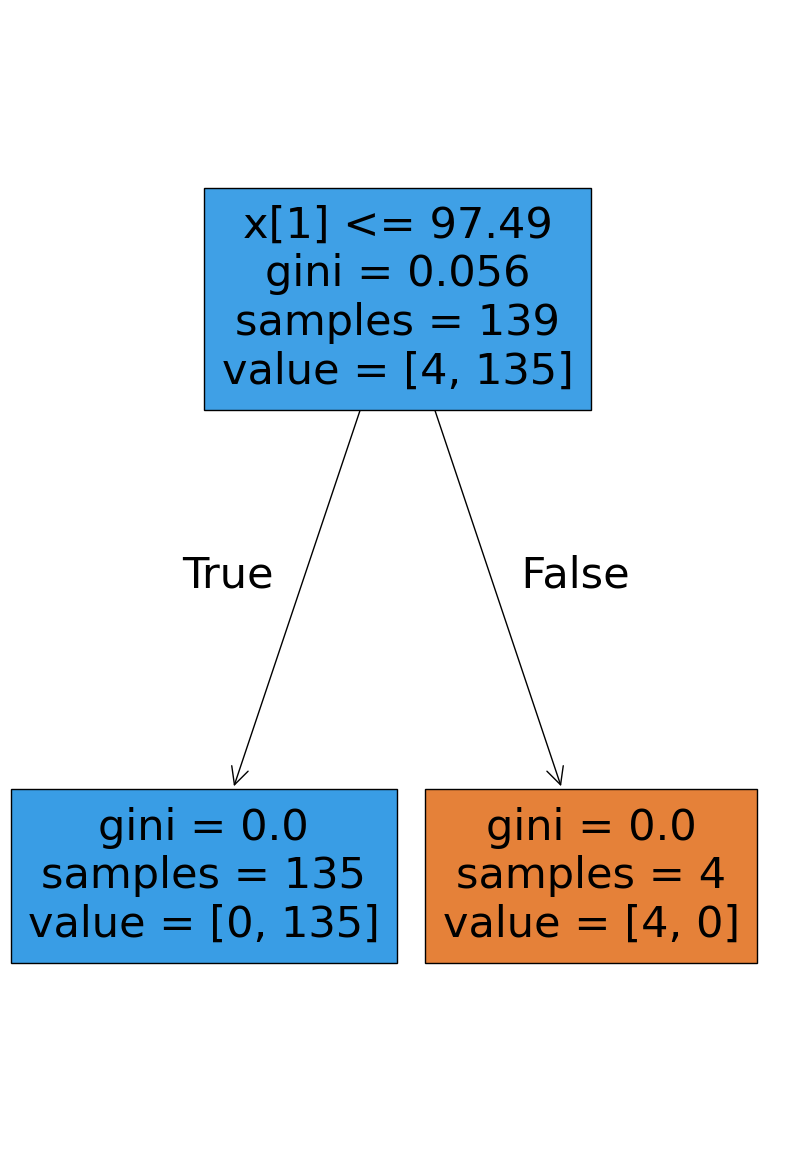

In [120]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)
print(accuracy_score(y_test, y_pred_dt))
from sklearn import tree
plt.figure(figsize=(10,15))
tree.plot_tree(dt_model,filled=True)

In [121]:
#to apply svm 
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold

In [122]:
scv=SVC(probability=True)

In [123]:
para={
    "C":[0.0001,0.001,0.01,0.1,1],
    "kernel":["rbf","linear"]
}

In [124]:
kf=KFold(5,shuffle=True)

In [125]:
final_model=GridSearchCV(scv,param_grid=para,cv=kf,scoring='accuracy')

In [126]:
final_model.fit(x_pca,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=SVC(probability=True),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [127]:
final_model.best_params_
final_model.best_score_

np.float64(1.0)

In [128]:
fsm=final_model.best_estimator_
fsm.fit(x_pca,y)

SVC(C=0.0001, kernel='linear', probability=True)

In [129]:
import pickle as pick


In [130]:
file1="face_recog_model.pkl"

In [131]:
f1=open(file1,"wb")


In [132]:
pick.dump(fsm,f1)
f1.close()

In [134]:
# file 2 
file2 = "scaling_model.pkl"
f2=open(file2,"wb")
pick.dump(scaler,f2)
f2.close()
print("scaling model")

scaling model


In [135]:
#file3 
file3="pca_model.pkl"

In [136]:
f3=open(file3,"wb")
pick.dump(pca,f3)
f3.close()